In [28]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv("data/city_data.csv")
ride_data_df = pd.read_csv("data/ride_data.csv")
# city_data_df
# ride_data_df

# Combine the data into a single dataset

combined_df = pd.merge(city_data_df, ride_data_df, on="city", how="left")
# combined_data

# Display the data table for preview
combined_df.head()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

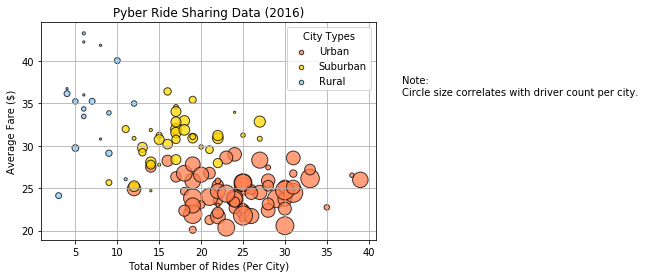

In [13]:
# Obtain the x and y coordinates for each of the three city types
urban_city_type = combined_df[combined_df["type"] == "Urban"].groupby([combined_df["city"]])
rural_city_type = combined_df[combined_df["type"] == "Rural"].groupby([combined_df["city"]])
suburban_city_type = combined_df[combined_df["type"] == "Suburban"].groupby([combined_df["city"]])

# Calculations for Urban of ride count, fare average & driver count average
x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].mean()
# Calculations for Suburban of ride count, fare average & driver count average
x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].mean()
# Calculations for Rural of ride count, fare average & driver count average
x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].mean()


# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 5, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban * 5, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 5, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Create a legend

legend = plt.legend(fontsize = 10, title = "City Types", loc = "best")
legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [20]
legend.legendHandles[2]._sizes = [20]

# Incorporate a text label regarding circle size
plt.text(44,36,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("../Images/PyberRideSharingData.png", bbox_inches="tight")


# Show plot
plt.show()


## Total Fares by City Type

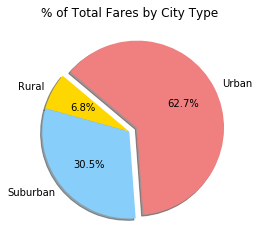

In [17]:
# Calculate Type Percents

fares_groupped = combined_df.groupby(['type'])
fares_total = fares_groupped['fare'].sum()
#fare_sum

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fares_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/TotalFaresbyCityType.png")


plt.show()



## Total Rides by City Type

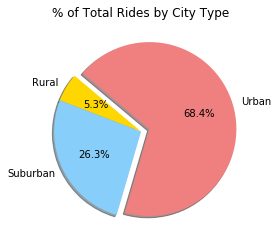

In [18]:
# Calculate Ride Percents
rides_count = fares_groupped['ride_id'].count()
#rides_count

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/TotalRidesbyCityType")

plt.show()


## Total Drivers by City Type

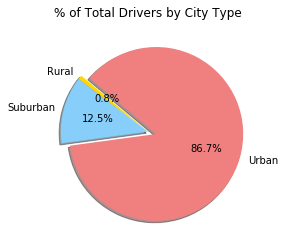

In [25]:
# Calculate Driver Percents
drivers_groupped = combined_df.groupby(['type'])
drivers_sum = drivers_groupped['driver_count'].sum()
#drivers_sum


# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure

plt.savefig("../Images/TotalDriversbyCityType.png")

# Show Figure

plt.show()




In [ ]:
# Three Observable Trends
# 1, The average fare was considerably higher in rural areas compared to suburban and especially urban areas. This is due to the fact that there are less drivers
# working in the rural areas. This is most likely because of the remoteness of the area, which means less people live there, therefore less passengers.
# 2, On the flipside to my first point, the lower fares charged by the urban drivers highlights the higher frequency of passengers as well as the competition they are facing from other drivers.
# 3, Pyber's bulk of business comes from its Urban areas and its not even close. With 62.7% of total fares